<a href="https://colab.research.google.com/github/ejrtks1020/Deep_learning_library/blob/main/_4_%EC%BC%80%EB%9D%BC%EC%8A%A4_%EB%8B%A4%EC%96%91%ED%95%9C_%ED%95%99%EC%8A%B5_%EA%B8%B0%EC%88%A0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 케라스 다양한 학습 기술

- 과대적합, 과소적합을 막기 위한 방법들
  - 모델의 크기 축소
  
  - 초기화

  - 옵티마이저

  - 배치 정규화

  - 규제화

### 모델의 크기 축소
- 가장 단순한 방법

- 모델의 크기를 줄인다는 것은 **학습 파라미터의 수를 줄이는 것**

#### 데이터 준비
- 설명을 위한 코드

In [ ]:
from tensorflow.keras.datasets import imdb
import numpy as np

(train_data, train_labels), (test_data, test_labels) =  imdb.load_data(num_words = 10000)

def vectorize_seq(seqs, dim= 10000):
  results = np.zeros((len(seqs), dim))
  for i , seq in enumerate(seqs):
    results[i, seq] = 1.

  return results

x_train = vectorize_seq(train_data)
x_test = vectorize_seq(test_data)

y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

#### 2가지의 모델 설정

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
model_1 = Sequential([Dense(16, activation='relu', input_shape=(10000,), name = 'input'),
                      Dense(16, activation = 'relu', name ='hidden'),
                      Dense(1, activation = 'sigmoid', name = 'output')])

In [ ]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (Dense)                (None, 16)                160016    
_________________________________________________________________
hidden (Dense)               (None, 16)                272       
_________________________________________________________________
output (Dense)               (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_2 = Sequential([Dense(7, activation='relu', input_shape = (10000,), name = 'input2'),
                    Dense(7, activation= 'relu', name = 'hidden2'),
                    Dense(1, activation='sigmoid', name = 'output2')])

In [ ]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input2 (Dense)               (None, 7)                 70007     
_________________________________________________________________
hidden2 (Dense)              (None, 7)                 56        
_________________________________________________________________
output2 (Dense)              (None, 1)                 8         
Total params: 70,071
Trainable params: 70,071
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_1.compile(optimizer='rmsprop',
                loss = 'binary_crossentropy',
                metrics = ['acc'])

model_2.compile(optimizer='rmsprop',
                loss = 'binary_crossentropy',
                metrics = ['acc'])


**모델1과 모델2는 현재 하이퍼 파라미터의 수만 다른 상황**

#### 2개의 모델 학습

In [ ]:
model_1_hist = model_1.fit(x_train, y_train,
                           epochs = 20,
                           batch_size = 512,
                           validation_data = (x_test, y_test))

Epoch 1/20
49/49 [==============================] - 4s 68ms/step - loss: 0.4674 - acc: 0.8123 - val_loss: 0.3474 - val_acc: 0.8769
Epoch 2/20
49/49 [==============================] - 3s 52ms/step - loss: 0.2657 - acc: 0.9089 - val_loss: 0.2861 - val_acc: 0.8896
Epoch 3/20
49/49 [==============================] - 2s 51ms/step - loss: 0.2026 - acc: 0.9303 - val_loss: 0.2812 - val_acc: 0.8876
Epoch 4/20
49/49 [==============================] - 2s 50ms/step - loss: 0.1676 - acc: 0.9416 - val_loss: 0.2923 - val_acc: 0.8835
Epoch 5/20
49/49 [==============================] - 2s 51ms/step - loss: 0.1476 - acc: 0.9488 - val_loss: 0.3108 - val_acc: 0.8797
Epoch 6/20
49/49 [==============================] - 3s 52ms/step - loss: 0.1244 - acc: 0.9583 - val_loss: 0.3322 - val_acc: 0.8749
Epoch 7/20
49/49 [==============================] - 3s 52ms/step - loss: 0.1096 - acc: 0.9642 - val_loss: 0.3695 - val_acc: 0.8667
Epoch 8/20
49/49 [==============================] - 3s 53ms/step - loss: 0.0952 - a

In [ ]:
model_2_hist = model_2.fit(x_train, y_train,
                           epochs = 20,
                           batch_size = 512,
                           validation_data = (x_test, y_test))

Epoch 1/20
49/49 [==============================] - 4s 71ms/step - loss: 0.4731 - acc: 0.8109 - val_loss: 0.3611 - val_acc: 0.8754
Epoch 2/20
49/49 [==============================] - 3s 52ms/step - loss: 0.2834 - acc: 0.9044 - val_loss: 0.2961 - val_acc: 0.8869
Epoch 3/20
49/49 [==============================] - 3s 53ms/step - loss: 0.2196 - acc: 0.9243 - val_loss: 0.2911 - val_acc: 0.8837
Epoch 4/20
49/49 [==============================] - 3s 53ms/step - loss: 0.1833 - acc: 0.9368 - val_loss: 0.2842 - val_acc: 0.8854
Epoch 5/20
49/49 [==============================] - 3s 52ms/step - loss: 0.1598 - acc: 0.9439 - val_loss: 0.2931 - val_acc: 0.8842
Epoch 6/20
49/49 [==============================] - 3s 53ms/step - loss: 0.1427 - acc: 0.9516 - val_loss: 0.3082 - val_acc: 0.8791
Epoch 7/20
49/49 [==============================] - 3s 53ms/step - loss: 0.1267 - acc: 0.9582 - val_loss: 0.3368 - val_acc: 0.8726
Epoch 8/20
49/49 [==============================] - 3s 64ms/step - loss: 0.1160 - a

#### 비교

In [ ]:
epochs = range(1, 21)
model_1_val_loss = model_1_hist.history['val_loss']
model_2_val_loss = model_2_hist.history['val_loss']

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

model_2 (더 작은 모델)이 '조금 더 나중에' 과대적합 발생

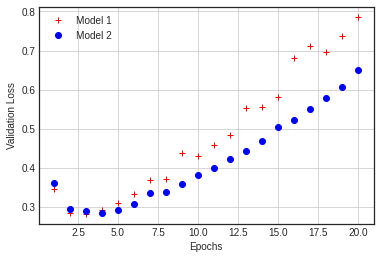

In [ ]:
plt.plot(epochs , model_1_val_loss, 'r+', label = 'Model 1')
plt.plot(epochs , model_2_val_loss, 'bo', label = 'Model 2')
plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.legend()
plt.grid()
plt.show()

### 모델의 크기 축소 (2)


#### 모델 구성

In [ ]:
model_3 = Sequential([Dense(1024, activation = 'relu', input_shape = (10000,), name = 'input'),
                      Dense(1024, activation = 'relu', name = 'hidden3'),
                      Dense(1, activation = 'sigmoid', name = 'output3')])

model_3.compile(optimizer = 'rmsprop',
                loss = 'binary_crossentropy',
                metrics = ['acc'])

model_3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (Dense)                (None, 1024)              10241024  
_________________________________________________________________
hidden3 (Dense)              (None, 1024)              1049600   
_________________________________________________________________
output3 (Dense)              (None, 1)                 1025      
Total params: 11,291,649
Trainable params: 11,291,649
Non-trainable params: 0
_________________________________________________________________


#### 모델 학습
- 시간 소요

In [ ]:
model_3_hist = model_3.fit(x_train, y_train,
                           epochs = 20,
                           batch_size = 512,
                           validation_data = (x_test, y_test))

Epoch 1/20
49/49 [==============================] - 37s 740ms/step - loss: 0.5383 - acc: 0.7963 - val_loss: 0.4613 - val_acc: 0.8108
Epoch 2/20
49/49 [==============================] - 35s 723ms/step - loss: 0.2264 - acc: 0.9112 - val_loss: 0.2738 - val_acc: 0.8914
Epoch 3/20
49/49 [==============================] - 35s 726ms/step - loss: 0.1215 - acc: 0.9575 - val_loss: 0.3306 - val_acc: 0.8865
Epoch 4/20
49/49 [==============================] - 35s 723ms/step - loss: 0.0771 - acc: 0.9821 - val_loss: 0.4364 - val_acc: 0.8870
Epoch 5/20
49/49 [==============================] - 35s 722ms/step - loss: 0.1064 - acc: 0.9860 - val_loss: 0.3809 - val_acc: 0.8832
Epoch 6/20
49/49 [==============================] - 35s 719ms/step - loss: 0.0016 - acc: 0.9999 - val_loss: 0.6437 - val_acc: 0.8832
Epoch 7/20
49/49 [==============================] - 35s 720ms/step - loss: 1.1554e-04 - acc: 1.0000 - val_loss: 0.7869 - val_acc: 0.8825
Epoch 8/20
49/49 [==============================] - 35s 721ms/ste

#### 시각화

In [ ]:
model_3_val_loss = model_3_hist.history['val_loss']

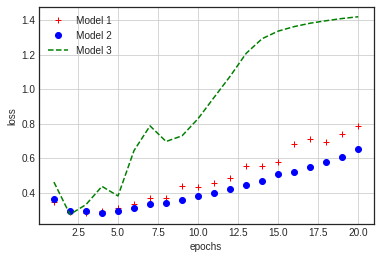

In [ ]:
plt.plot(epochs, model_1_val_loss, 'r+', label = 'Model 1')
plt.plot(epochs, model_2_val_loss, 'bo', label = 'Model 2')
plt.plot(epochs, model_3_val_loss, 'g--', label = 'Model 3')

plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.grid()
plt.show()

* 볼륨이 큰 신경망일수록 빠르게 훈련데이터 모델링 가능(학습 손실이 낮아짐)
* 과대 적합에는 더욱 민감해짐
* 이는 학습-검증 데이터의 손실을 보면 알 수 있음

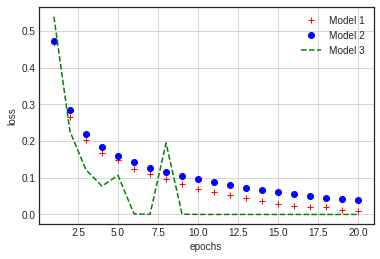

In [ ]:
model_1_train_loss = model_1_hist.history['loss']
model_2_train_loss = model_2_hist.history['loss']
model_3_train_loss = model_3_hist.history['loss']

plt.plot(epochs, model_1_train_loss, 'r+', label = 'Model 1')
plt.plot(epochs, model_2_train_loss, 'bo', label = 'Model 2')
plt.plot(epochs, model_3_train_loss, 'g--', label = 'Model 3')

plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.grid()
plt.show()

model3는 빠르게 loss값이 감소

### 가중치 초기화


#### 초기화 전략

- Glorot Initialization (Xavier)
  - 활성화 함수  
    - 없음
    - tanh
    - sigmoid
    - softmax

- He Initialization 
  - 활성화 함수  
    - ReLU
    - LeakyReLU
    - ELU 등

    

In [ ]:
from tensorflow.keras.layers import Dense, LeakyReLU, Activation
from tensorflow.keras.models import Sequential

In [ ]:
model = Sequential([Dense(30 , kernel_initializer='he_normal', input_shape = [10, 10]),
                    LeakyReLU(alpha = 0.2),
                    Dense(1, kernel_initializer='he_normal'),
                    Activation("softmax")])

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10, 30)            330       
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 10, 30)            0         
_________________________________________________________________
dense_1 (Dense)              (None, 10, 1)             31        
_________________________________________________________________
activation (Activation)      (None, 10, 1)             0         
Total params: 361
Trainable params: 361
Non-trainable params: 0
_________________________________________________________________


### 고속 옵티마이저

#### 모멘텀 최적화

$
\qquad v \ \leftarrow \ \alpha \ v - \gamma \ \frac{\partial L}{\partial W} \\
\qquad W \ \leftarrow \ W \ + \ v
$

  - $\alpha\ $ : 관성계수 

  - $v$ :  속도

  - $\gamma\ $ : 학습률

  - $\frac{\partial L}{\partial W}\ $ : 손실함수에 대한 미분

In [ ]:
import tensorflow as tf
from tensorflow.keras.optimizers import SGD

In [ ]:
optimizer = SGD(learning_rate= 0.001, momentum = 0.9) # momentum = 관성계수

#### 네스테로프 (Nesterov)

- 모멘텀의 방향으로 조금 앞선 곳에서 손실함수의 그라디언트를 구함

- 시간이 지날수록 조금 더 빨리 최솟값에 도달

$
\qquad m \ \leftarrow \  \beta m - \eta \bigtriangledown_\theta J(\theta + \beta m) \\
\qquad \theta \ \leftarrow \ \theta \ + m
$


  - $h\ $ : 기존 기울기를 제곱하여 더한 값

  - $\eta\ $ : 학습률

  - $\bigtriangledown_\theta J(\theta) \ $ : $\theta$에 대한 미분(그라디언트)

  <img src="https://t1.daumcdn.net/cfile/tistory/99D91C455C76428D11">

  <sub>출처: CS231n</sub>

In [ ]:
optimizer = SGD(learning_rate= 0.001, momentum = 0.9, nesterov=True) #조금더 빨리 최솟값에 접근가능

#### AdaGrad

- 보통 간단한 모델에는 효과 좋을 수는 있으나, 심층 신경망 모델에서는 사용 X

$
\qquad h \ \leftarrow \  h + \frac{\partial L}{\partial W} \odot \frac{\partial L}{\partial W} \\
\qquad W \ \leftarrow \ W \ + \gamma \frac{1}{\sqrt h} \ \frac{\partial L}{\partial W}
$

  - $h\ $ : 기존 기울기를 제곱하여 더한 값

  - $\gamma\ $ : 학습률

  - $\frac{\partial L}{\partial W}\ $ : $W$에 대한 미분


In [ ]:
from tensorflow.keras.optimizers import Adagrad

In [ ]:
optimizer = Adagrad(learning_rate= 0.001)

#### RMSProp


$
\qquad s \ \leftarrow \ \beta \ s + (1 - \beta) \bigtriangledown_{\theta} J(\theta) \otimes \bigtriangledown_{\theta} J(\theta) \\
\qquad \theta \ \leftarrow \ \theta \ - \eta  \ \bigtriangledown_{\theta} J(\theta) \oslash \sqrt{s + \epsilon}
$

  - $s \ $ : 그래디언트의 제곱을 감쇠율을 곱한 후 더함

  - $\eta\ $ : 학습률

  - $\bigtriangledown_{\theta} J(\theta) \ $ : 손실함수의 미분값


  

In [ ]:
from tensorflow.keras.optimizers import RMSprop

In [ ]:
optimizer = RMSprop(learning_rate= 0.001, rho = 0.9)

#### Adam

$
\qquad m \ \leftarrow \  \beta_1 \ m - (1 - \beta_1)\ \frac{\partial L}{\partial W}  \\
\qquad s \ \leftarrow \ \beta_2 \ s + (1 - \beta_2) \frac{\partial L}{\partial W} \odot \frac{\partial L}{\partial W} \\
\qquad \hat{m} \ \leftarrow \frac{m}{1 - \beta_1^t} \\
\qquad \hat{s} \ \leftarrow \frac{s}{1 - \beta_2^t} \\
\qquad W \ \leftarrow \ W \ + \gamma \ \hat{m}\  \oslash \sqrt{\hat{s} + \epsilon}
$

  - $\beta\ $ : 지수 평균의 업데이트 계수

  - $\gamma\ $ : 학습률

  - $\beta_1 \approx 0.9\ ,\ \ \beta_2 \approx 0.999$

  - $\frac{\partial L}{\partial W}\ $ : $W$에 대한 미분

In [ ]:
from tensorflow.keras.optimizers import Adam

In [ ]:
optimizer = Adam(learning_rate = 0.001, beta_1=0.9, beta_2 = 0.999)

### 배치 정규화
- 모델에 주입되는 샘플들을 균일하게 만드는 방법

- 학습 후 새로운 데이터에 잘 **일반화** 할 수 있도록 도와줌

- 데이터 전처리 단계에서 진행해도 되지만 정규화가 되어서 layer에 들어갔다는 보장이 없음

- 주로 **Dense** 또는 **Conv2D** Layer 후, **활성화 함수**이전에 놓임


In [ ]:
from tensorflow.keras.layers import BatchNormalization, Dense ,Activation
from tensorflow.keras.utils import plot_model

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 32)                25120     
_________________________________________________________________
batch_normalization_1 (Batch (None, 32)                128       
_________________________________________________________________
activation_2 (Activation)    (None, 32)                0         
Total params: 25,248
Trainable params: 25,184
Non-trainable params: 64
_________________________________________________________________


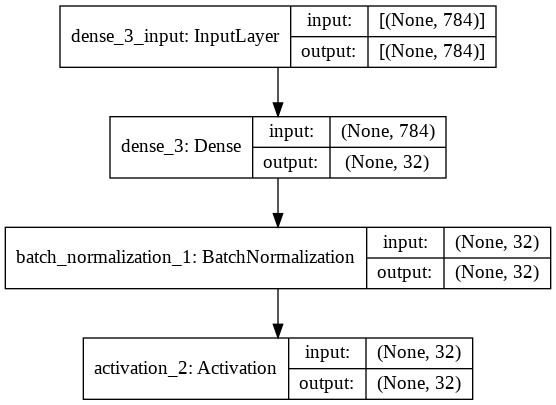

In [ ]:
model = Sequential()

model.add(Dense(32, input_shape = (28*28,), kernel_initializer= 'he_normal'))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.summary()
plot_model(model, show_shapes = True)

### 규제화
- 복잡한 네트워크 일수록 네트워크의 복잡도에 제한을 두어  
  가중치가 작은 값을 가지도록 함

- 가중치의 분포가 더 균일하게 됨

- 네트워크 손실함수에 큰 가중치에 연관된 비용을 추가
  - L1 규제 : 가중치의 절댓값에 비례하는 비용이 추가
  - L2 규제 : 가중치의 제곱에 비례하는 비용이 추가(흔히 가중치 감쇠라고도 불림)
  - 위 2규제가 합쳐진 경우도 존재

데이터는 **모델의 크기** 파트에서 사용된 imdb dataset

In [ ]:
from tensorflow.keras.regularizers import l1, l2 ,l1_l2

#### 모델 구성

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 16)                160016    
_________________________________________________________________
dense_11 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


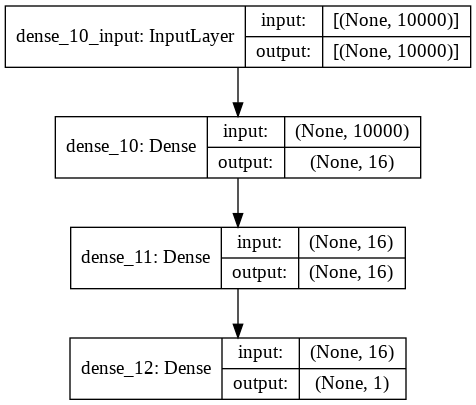

In [ ]:
l2_model = Sequential([Dense(16, kernel_regularizer=l2(0.001), activation = 'relu', input_shape = (10000,)),
                       Dense(16, kernel_regularizer=l2(0.001), activation= 'relu'),
                       Dense(1, activation = 'sigmoid')])

l2_model.compile(optimizer = 'rmsprop',
                 loss = 'binary_crossentropy',
                 metrics = ['acc'])

l2_model.summary()

plot_model(l2_model, show_shapes= True)

#### 모델 학습

In [ ]:
l2_model_hist = l2_model.fit(x_train, y_train,
                             epochs = 20,
                             batch_size = 512,
                             validation_data = (x_test, y_test))


Epoch 1/20
49/49 [==============================] - 5s 83ms/step - loss: 0.4934 - acc: 0.8137 - val_loss: 0.3896 - val_acc: 0.8686
Epoch 2/20
49/49 [==============================] - 2s 40ms/step - loss: 0.3110 - acc: 0.9052 - val_loss: 0.3320 - val_acc: 0.8901
Epoch 3/20
49/49 [==============================] - 2s 39ms/step - loss: 0.2672 - acc: 0.9220 - val_loss: 0.3298 - val_acc: 0.8883
Epoch 4/20
49/49 [==============================] - 2s 39ms/step - loss: 0.2480 - acc: 0.9291 - val_loss: 0.3351 - val_acc: 0.8872
Epoch 5/20
49/49 [==============================] - 2s 40ms/step - loss: 0.2353 - acc: 0.9337 - val_loss: 0.3427 - val_acc: 0.8851
Epoch 6/20
49/49 [==============================] - 2s 39ms/step - loss: 0.2249 - acc: 0.9378 - val_loss: 0.3496 - val_acc: 0.8827
Epoch 7/20
49/49 [==============================] - 2s 39ms/step - loss: 0.2188 - acc: 0.9408 - val_loss: 0.3610 - val_acc: 0.8789
Epoch 8/20
49/49 [==============================] - 2s 39ms/step - loss: 0.2130 - a

#### 시각화
- Model 1은 **모델의 크기 축소**파트에서의 모델

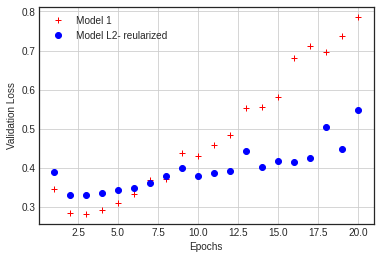

In [ ]:
l2_model_val_loss = l2_model_hist.history['val_loss']

epochs = range(1, 21)

plt.plot(epochs, model_1_val_loss, 'r+', label = 'Model 1')
plt.plot(epochs,  l2_model_val_loss, 'bo', label = 'Model L2- reularized')
plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.legend()
plt.grid()

plt.show()

#### L1과 비교

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 16)                160016    
_________________________________________________________________
dense_14 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


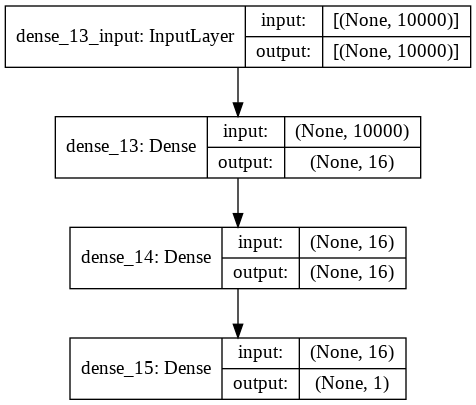

In [ ]:
l1_model = Sequential([Dense(16, kernel_regularizer=l1(0.0001), activation = 'relu', input_shape = (10000,)),
                       Dense(16, kernel_regularizer=l1(0.0001), activation= 'relu'),
                       Dense(1, activation = 'sigmoid')])

l1_model.compile(optimizer = 'rmsprop',
                 loss = 'binary_crossentropy',
                 metrics = ['acc'])

l1_model.summary()

plot_model(l1_model, show_shapes= True) 

In [ ]:
l1_model_hist = l1_model.fit(x_train, y_train,
                             epochs = 20,
                             batch_size = 512,
                             validation_data = (x_test, y_test))


Epoch 1/20
49/49 [==============================] - 3s 52ms/step - loss: 0.5705 - acc: 0.8132 - val_loss: 0.4413 - val_acc: 0.8772
Epoch 2/20
49/49 [==============================] - 2s 40ms/step - loss: 0.3854 - acc: 0.8932 - val_loss: 0.3757 - val_acc: 0.8896
Epoch 3/20
49/49 [==============================] - 2s 40ms/step - loss: 0.3408 - acc: 0.9044 - val_loss: 0.3677 - val_acc: 0.8862
Epoch 4/20
49/49 [==============================] - 2s 40ms/step - loss: 0.3206 - acc: 0.9110 - val_loss: 0.3685 - val_acc: 0.8856
Epoch 5/20
49/49 [==============================] - 2s 41ms/step - loss: 0.3121 - acc: 0.9126 - val_loss: 0.3805 - val_acc: 0.8763
Epoch 6/20
49/49 [==============================] - 2s 41ms/step - loss: 0.3046 - acc: 0.9170 - val_loss: 0.3781 - val_acc: 0.8817
Epoch 7/20
49/49 [==============================] - 2s 40ms/step - loss: 0.2998 - acc: 0.9180 - val_loss: 0.3798 - val_acc: 0.8815
Epoch 8/20
49/49 [==============================] - 2s 40ms/step - loss: 0.2941 - a

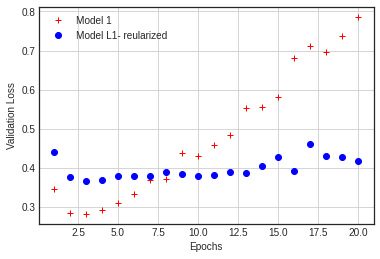

In [ ]:
l1_model_val_loss = l1_model_hist.history['val_loss']

epochs = range(1, 21)

plt.plot(epochs, model_1_val_loss, 'r+', label = 'Model 1')
plt.plot(epochs,  l1_model_val_loss, 'bo', label = 'Model L1- reularized')
plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.legend()
plt.grid()

plt.show()

3가지 모델 비교
- Original
- L1
- L2

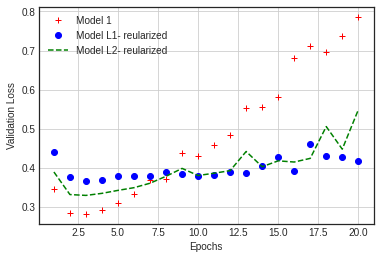

In [ ]:

epochs = range(1, 21)

plt.plot(epochs, model_1_val_loss, 'r+', label = 'Model 1')
plt.plot(epochs,  l1_model_val_loss, 'bo', label = 'Model L1- reularized')
plt.plot(epochs,  l2_model_val_loss, 'g--', label = 'Model L2- reularized')
plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.legend()
plt.grid()

plt.show()

#### L1, L2와 비교

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 16)                160016    
_________________________________________________________________
dense_17 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_18 (Dense)             (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


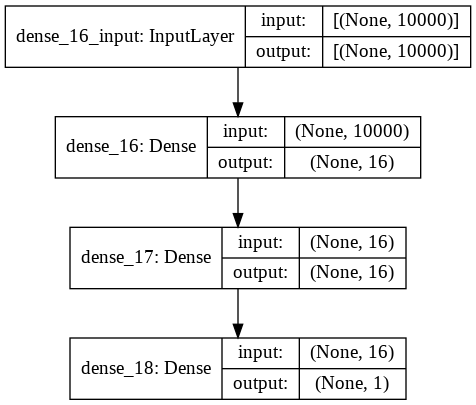

In [ ]:
l1_l2_model = Sequential([Dense(16, kernel_regularizer=l1_l2(l1 = 0.0001, l2 = 0.0001),
                                activation = 'relu', input_shape = (10000,)),
                       Dense(16, kernel_regularizer=l1_l2(l1 = 0.0001 , l2 = 0.0001), activation= 'relu'),
                       Dense(1, activation = 'sigmoid')])

l1_l2_model.compile(optimizer = 'rmsprop',
                 loss = 'binary_crossentropy',
                 metrics = ['acc'])

l1_l2_model.summary()

plot_model(l1_l2_model, show_shapes= True) 

In [ ]:
l1_l2_model_hist = l1_l2_model.fit(x_train, y_train,
                             epochs = 20,
                             batch_size = 512,
                             validation_data = (x_test, y_test))

Epoch 1/20
49/49 [==============================] - 3s 53ms/step - loss: 0.5686 - acc: 0.8139 - val_loss: 0.4446 - val_acc: 0.8704
Epoch 2/20
49/49 [==============================] - 2s 41ms/step - loss: 0.3808 - acc: 0.8940 - val_loss: 0.3744 - val_acc: 0.8869
Epoch 3/20
49/49 [==============================] - 2s 41ms/step - loss: 0.3358 - acc: 0.9067 - val_loss: 0.3632 - val_acc: 0.8862
Epoch 4/20
49/49 [==============================] - 2s 40ms/step - loss: 0.3211 - acc: 0.9072 - val_loss: 0.3741 - val_acc: 0.8790
Epoch 5/20
49/49 [==============================] - 2s 40ms/step - loss: 0.3070 - acc: 0.9145 - val_loss: 0.3625 - val_acc: 0.8846
Epoch 6/20
49/49 [==============================] - 2s 40ms/step - loss: 0.3006 - acc: 0.9164 - val_loss: 0.3616 - val_acc: 0.8864
Epoch 7/20
49/49 [==============================] - 2s 40ms/step - loss: 0.2935 - acc: 0.9199 - val_loss: 0.3795 - val_acc: 0.8782
Epoch 8/20
49/49 [==============================] - 2s 40ms/step - loss: 0.2849 - a

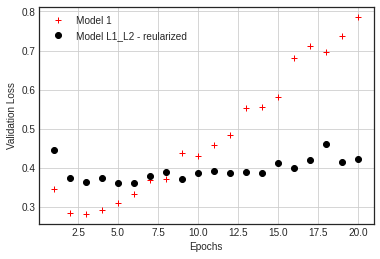

In [ ]:
l1_l2_model_val_loss = l1_l2_model_hist.history['val_loss']

epochs = range(1, 21)

plt.plot(epochs, model_1_val_loss, 'r+', label = 'Model 1')
plt.plot(epochs,  l1_l2_model_val_loss, 'ko', label = 'Model L1_L2 - reularized')
plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.legend()
plt.grid()

plt.show()

4가지 모델 비교
- Original

- L1

- L2

- L1_L2

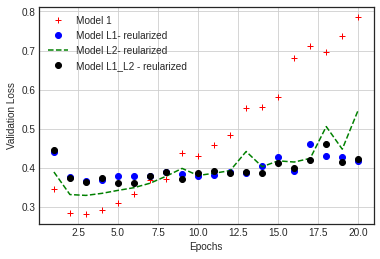

In [ ]:

epochs = range(1, 21)

plt.plot(epochs, model_1_val_loss, 'r+', label = 'Model 1')
plt.plot(epochs,  l1_model_val_loss, 'bo', label = 'Model L1- reularized')
plt.plot(epochs,  l2_model_val_loss, 'g--', label = 'Model L2- reularized')
plt.plot(epochs,  l1_l2_model_val_loss, 'ko', label = 'Model L1_L2 - reularized')
plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.legend()
plt.grid()

plt.show()

### 드롭아웃(Dropout)
- 신경망을 위해 사용되는 규제 기법 중 가장 효과적이고 널리 사용되는 방법

- 신경망의 레이어에 드롭아웃을 적용하면 훈련하는 동안 무작위로 층의 일부 특성(노드)를 제외
  - 예를 들어, [1.0, 3.2, 0.6, 0.8, 1.1] 라는 벡터에 대해 드롭아웃을 적용하면 **무작위로 0으로 바뀜**  
    $\rightarrow$ [0, 3.2, 0.6, 0.8, 0]

  - 보통 0.2 ~ 0.5 사이의 비율로 지정됨

- 테스트 단계에서는 그 어떤 노드도 드롭아웃 되지 않는다.
  - 대신 해당 레이어의 출력 노드를 드롭아웃 비율에 맞게 줄여줌

In [ ]:
from tensorflow.keras.layers import Dropout

#### 모델 구성

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_19 (Dense)             (None, 16)                160016    
_________________________________________________________________
dropout (Dropout)            (None, 16)                0         
_________________________________________________________________
dense_20 (Dense)             (None, 16)                272       
_________________________________________________________________
dropout_1 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_21 (Dense)             (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


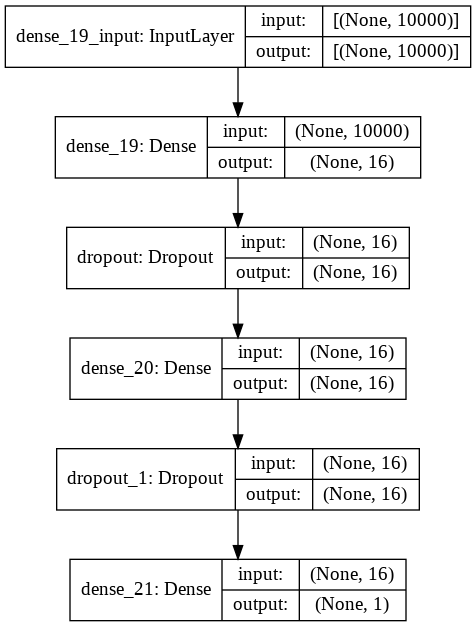

In [ ]:
dropout_model = Sequential([Dense(16, activation = 'relu', input_shape = (10000,)),
                            Dropout(0.5),
                            Dense(16,activation= 'relu'),
                            Dropout(0.5),
                            Dense(1, activation = 'sigmoid')])

dropout_model.compile(optimizer = 'rmsprop',
                 loss = 'binary_crossentropy',
                 metrics = ['acc'])

dropout_model.summary()

plot_model(dropout_model, show_shapes= True) 

#### 모델 학습

In [ ]:
dropout_model_hist = dropout_model.fit(x_train, y_train,
                             epochs = 20,
                             batch_size = 512,
                             validation_data = (x_test, y_test))

Epoch 1/20
49/49 [==============================] - 5s 91ms/step - loss: 0.5749 - acc: 0.6989 - val_loss: 0.4052 - val_acc: 0.8661
Epoch 2/20
49/49 [==============================] - 2s 39ms/step - loss: 0.4121 - acc: 0.8303 - val_loss: 0.3134 - val_acc: 0.8854
Epoch 3/20
49/49 [==============================] - 2s 38ms/step - loss: 0.3328 - acc: 0.8726 - val_loss: 0.2832 - val_acc: 0.8897
Epoch 4/20
49/49 [==============================] - 2s 39ms/step - loss: 0.2847 - acc: 0.8966 - val_loss: 0.2773 - val_acc: 0.8894
Epoch 5/20
49/49 [==============================] - 2s 38ms/step - loss: 0.2505 - acc: 0.9122 - val_loss: 0.2945 - val_acc: 0.8855
Epoch 6/20
49/49 [==============================] - 2s 38ms/step - loss: 0.2222 - acc: 0.9229 - val_loss: 0.2995 - val_acc: 0.8873
Epoch 7/20
49/49 [==============================] - 2s 38ms/step - loss: 0.1987 - acc: 0.9312 - val_loss: 0.3133 - val_acc: 0.8850
Epoch 8/20
49/49 [==============================] - 2s 39ms/step - loss: 0.1784 - a

#### 시각화

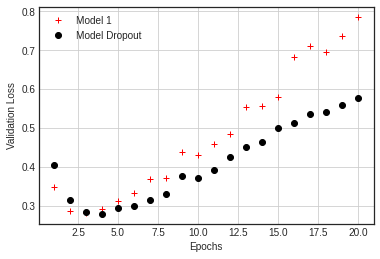

In [ ]:
dropout_model_val_loss = dropout_model_hist.history['val_loss']

epochs = range(1, 21)

plt.plot(epochs, model_1_val_loss, 'r+', label = 'Model 1')
plt.plot(epochs,  dropout_model_val_loss, 'ko', label = 'Model Dropout')
plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.legend()
plt.grid()

plt.show()